QUESTION 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1.0

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.loss_history = []

    def fit(self, X, y):
        samples, features = X.shape

        self.w = np.zeros(features)
        self.b = 0

        for _ in range(self.epochs):

            y_pred = []
            for i in range(samples):
                y_pred.append(np.dot(X[i], self.w) + self.b)
            y_pred = np.array(y_pred)
            error = y_pred - y

            dw = np.zeros(features)
            for j in range(features):
                dw[j] = (np.sum(error * X[:, j]) / samples) \
                        + self.l2_lambda*self.w[j]

            db =np.sum(error)/samples
            self.w-=self.lr*dw
            self.b-=self.lr*db

            loss = (np.sum(error**2) / (2*samples)) \
                   + (self.l2_lambda / 2) * np.sum(self.w ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            y_pred.append(np.dot(X[i],self.w)+self.b)
        return np.array(y_pred)


plot: loss vs iteration


In [ ]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [ ]:
model = LinearRegressionManual(lr=0.01, epochs=500, l2_lambda=0.1)
model.fit(X_scaled, y)


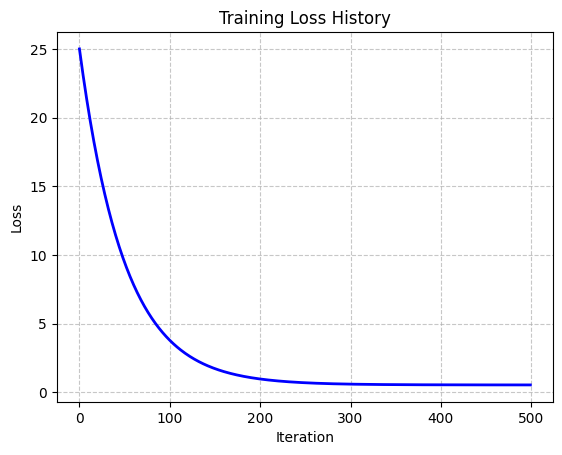

In [ ]:
plt.plot(range(len(model.loss_history)), model.loss_history, color='blue', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.grid(True, linestyle='--', alpha=0.7)


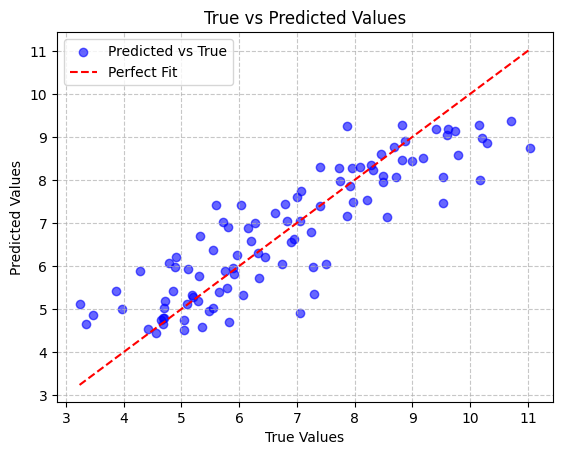

In [ ]:

y_pred = model.predict(X_scaled)
plt.scatter(y, y_pred, color='blue', alpha=0.6, label='Predicted vs True')
max_val = max(y.max(), y_pred.max())
min_val = min(y.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


Question 2

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01,epochs=1000,l2_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.loss_history = []

    def fit(self, X, y):
        samples,features = X.shape
        self.w = np.zeros(features)
        self.b = 0

        for i in range(self.epochs):
            linear_model=np.dot(X, self.w) + self.b
            y_predicted =sigmoid(linear_model)
            dw = (1/samples)*np.dot(X.T,(y_predicted-y))+(self.l2_lambda/samples)*self.w
            db = (1/samples)*np.sum(y_predicted-y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # 4. (Binary Cross Entropy)

            term1 = y*np.log(y_predicted+1e-15)
            term2 = (1-y)*np.log(1-y_predicted+1e-15)
            loss =-np.mean(term1+term2)+(self.l2_lambda /(2*samples))*np.sum(self.w**2)
            self.loss_history.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.w) + self.b
        return sigmoid(linear_model)

    def predict(self, X):

        y_predicted_cls = [1 if i > 0.5 else 0 for i in self.predict_proba(X)]
        return np.array(y_predicted_cls)

Final Accuracy: 99.00%


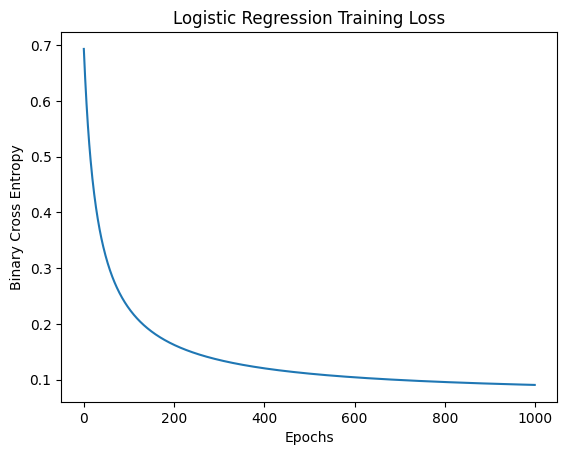

In [ ]:

from sklearn.datasets import make_classification
X_class, y_class = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)


scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_class)


model_lr = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model_lr.fit(X_scaled, y_class)

predictions = model_lr.predict(X_scaled)
accuracy = np.mean(predictions == y_class)
print(f"Final Accuracy: {accuracy * 100:.2f}%")


plt.plot(model_lr.loss_history)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy")
plt.show()

Question 3